<a href="https://colab.research.google.com/github/sabill/MLCC-Project/blob/master/first_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coba data yg klasifikasi (joint 2019 dr kaggle)

In [0]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
# from tensorflow import feature_column
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from matplotlib import pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
import io
from sklearn.impute import KNNImputer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
uploaded = files.upload()
train_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

train_df.head()

Saving train.csv to train (28).csv


,id,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,poi_1,poi_2,poi_3,size,price_monthly,room_count,total_call,gender
0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1778.0,10038.0,4106.0,9.00,1500000.0,6.0,72,campur
1,2,1.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN,4548.0,9332.0,6867.0,12.00,1500000.0,30.0,56,campur
2,3,1.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,5174.0,9021.0,3693.0,12.00,1600000.0,20.0,109,campur
3,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1490.0,8954.0,2139.0,8.25,1500000.0,15.0,54,campur
4,5,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1688.0,8851.0,2145.0,14.85,2100000.0,10.0,19,campur


Data Preprocessing

In [4]:
train_df.isnull().sum()

id                0
fac_1            63
fac_2            74
fac_3            62
fac_4            71
fac_5            72
fac_6            64
fac_7            78
fac_8            68
poi_1            67
poi_2            67
poi_3            86
size             68
price_monthly    85
room_count       70
total_call        0
gender            0
dtype: int64

In [5]:
for i in train_df.columns[1:9]:
  print(train_df[i].value_counts())

0.0    2385
1.0     845
Name: fac_1, dtype: int64
1.0    1958
0.0    1261
Name: fac_2, dtype: int64
0.0    1756
1.0    1475
Name: fac_3, dtype: int64
1.0    1812
0.0    1410
Name: fac_4, dtype: int64
1.0    2066
0.0    1155
Name: fac_5, dtype: int64
0.0    1848
1.0    1381
Name: fac_6, dtype: int64
0.0    3200
1.0      15
Name: fac_7, dtype: int64
1.0    1672
0.0    1553
Name: fac_8, dtype: int64


In [0]:
#fill null data (fac_1 until fac_8) with mode
for column in train_df.columns[1:9]:
  train_df[column] = train_df[column].fillna(train_df[column].mode()[0])

In [7]:
for i in train_df.columns[1:9]:
  print(train_df[i].value_counts())

0.0    2448
1.0     845
Name: fac_1, dtype: int64
1.0    2032
0.0    1261
Name: fac_2, dtype: int64
0.0    1818
1.0    1475
Name: fac_3, dtype: int64
1.0    1883
0.0    1410
Name: fac_4, dtype: int64
1.0    2138
0.0    1155
Name: fac_5, dtype: int64
0.0    1912
1.0    1381
Name: fac_6, dtype: int64
0.0    3278
1.0      15
Name: fac_7, dtype: int64
1.0    1740
0.0    1553
Name: fac_8, dtype: int64


In [0]:
gender = {'putri':0, 'putra':1, 'campur':2}
train_df['gender'] = train_df['gender'].map(gender)

In [9]:
#Fill missing value
imputer = KNNImputer(n_neighbors=10, weights="uniform")
train_df = pd.DataFrame(imputer.fit_transform(train_df))
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1778.0,10038.0,4106.0,9.00,1500000.0,6.0,72.0,2.0
1,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4548.0,9332.0,6867.0,12.00,1500000.0,30.0,56.0,2.0
2,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,5174.0,9021.0,3693.0,12.00,1600000.0,20.0,109.0,2.0
3,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1490.0,8954.0,2139.0,8.25,1500000.0,15.0,54.0,2.0
4,5.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1688.0,8851.0,2145.0,14.85,2100000.0,10.0,19.0,2.0


In [0]:
# for i in train_df.columns[1:9]:
#   print(train_df[i].value_counts())

In [11]:
train_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [0]:
#Y = train_df['price_monthly']
# plt.plot('poi_1', 'price_monthly', data = train_df, marker='', color='red', linewidth=2)
# plt.plot('poi_2', 'price_monthly', data = train_df, marker='', color='orange', linewidth=2)

# plt.xlabel('features')
# plt.ylabel('price monthly')
# plt.legend()

In [0]:
#fill null data based on ratio with price monthly
# train_df['poi_1'] = train_df['poi_1'].fillna(train_df['poi_1'].mean())
# train_df['poi_2'] = train_df['poi_2'].fillna(train_df['poi_2'].mean())
# train_df['poi_3'] = train_df['poi_3'].fillna(train_df['poi_3'].mean())
# train_df['size'] = train_df['size'].fillna(train_df['size'].mean())

In [14]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1778.0,10038.0,4106.0,9.00,1500000.0,6.0,72.0,2.0
1,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4548.0,9332.0,6867.0,12.00,1500000.0,30.0,56.0,2.0
2,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,5174.0,9021.0,3693.0,12.00,1600000.0,20.0,109.0,2.0
3,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1490.0,8954.0,2139.0,8.25,1500000.0,15.0,54.0,2.0
4,5.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1688.0,8851.0,2145.0,14.85,2100000.0,10.0,19.0,2.0


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3293 entries, 0 to 3292
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3293 non-null   float64
 1   1       3293 non-null   float64
 2   2       3293 non-null   float64
 3   3       3293 non-null   float64
 4   4       3293 non-null   float64
 5   5       3293 non-null   float64
 6   6       3293 non-null   float64
 7   7       3293 non-null   float64
 8   8       3293 non-null   float64
 9   9       3293 non-null   float64
 10  10      3293 non-null   float64
 11  11      3293 non-null   float64
 12  12      3293 non-null   float64
 13  13      3293 non-null   float64
 14  14      3293 non-null   float64
 15  15      3293 non-null   float64
 16  16      3293 non-null   float64
dtypes: float64(17)
memory usage: 437.5 KB


In [0]:
# def proportion(atributs, labels):
#   atribut = 

In [0]:
# train_df['room_count'] = train_df['room_count'].fillna(train_df['room_count'].mean())
# train_df['price_monthly'] = train_df['price_monthly'].fillna(train_df['price_monthly'].mean())

In [18]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1778.0,10038.0,4106.0,9.00,1500000.0,6.0,72.0,2.0
1,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4548.0,9332.0,6867.0,12.00,1500000.0,30.0,56.0,2.0
2,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,5174.0,9021.0,3693.0,12.00,1600000.0,20.0,109.0,2.0
3,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1490.0,8954.0,2139.0,8.25,1500000.0,15.0,54.0,2.0
4,5.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1688.0,8851.0,2145.0,14.85,2100000.0,10.0,19.0,2.0


{'boxes': [<matplotlib.lines.Line2D at 0x7fde0af45898>],
 'caps': [<matplotlib.lines.Line2D at 0x7fde0af5c208>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fde0af5cc88>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fde0af5c908>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdeb587ac88>,
  <matplotlib.lines.Line2D at 0x7fde0af45e48>]}

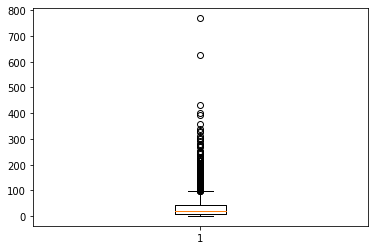

In [19]:
plt.boxplot(train_df[15])

{'boxes': [<matplotlib.lines.Line2D at 0x7fde0aa97358>],
 'caps': [<matplotlib.lines.Line2D at 0x7fde0aa97d68>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fde0aa22828>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fde0aa224a8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fde0aa97668>,
  <matplotlib.lines.Line2D at 0x7fde0aa979e8>]}

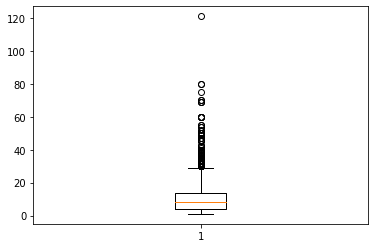

In [20]:
plt.boxplot(train_df[14])

In [0]:
def detect_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)

    iqr = q3 - q1
    rub = q3 + 1.5*iqr
    rlb = q1 - 1.5*iqr

    outlier = (data[column] < rlb) | (data[column] > rub)
    
    return data[outlier]

In [22]:
detect_outlier(train_df, 15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
2,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,5174.0,9021.0,3693.0,12.0000,1600000.0,20.0,109.0,2.0
30,31.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2908.0,9013.0,1958.0,21.0000,1700000.0,30.0,231.0,2.0
42,43.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4539.0,13800.0,2973.0,12.0000,600000.0,50.0,392.0,0.0
48,49.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1290.0,8770.0,2787.0,15.0000,800000.0,5.0,131.0,0.0
79,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1997.0,8389.0,2585.0,21.0000,320000.0,9.0,190.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3240,3241.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4744.0,14569.0,3918.0,9.0000,350000.0,27.0,216.0,0.0
3247,3248.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,5335.0,13246.0,3089.0,12.0000,700000.0,8.0,140.0,0.0
3273,3274.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5679.0,10593.0,3666.0,24.0000,1000000.0,6.0,130.0,2.0
3278,3279.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1938.0,8110.0,3378.0,12.0000,500000.0,16.0,111.0,0.0


In [0]:
# gender_dict =  {
#     'gender' : {
#         'putra' : 0,
#         'putri' : 1,
#         'campur' : 2
#     }
# }

# train_df.replace(gender_dict, inplace=True)

In [24]:
train_df[16]

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
3288    0.0
3289    0.0
3290    2.0
3291    0.0
3292    1.0
Name: 16, Length: 3293, dtype: float64

In [25]:
train_df.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3.293000e+03,3293.000000,3293.000000,3293.000000
mean,1647.000000,0.256605,0.617067,0.447920,0.571819,0.649256,0.419374,0.004555,0.528394,4671.839903,9918.217006,4898.635044,12.142708,8.989586e+05,10.501974,35.362587,0.660188
std,950.751545,0.436826,0.486176,0.497356,0.494890,0.477275,0.493532,0.067348,0.499269,3546.100682,4678.920808,3590.173464,4.905444,6.439704e+05,9.480365,47.269615,0.771365
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,519.000000,168.000000,324.000000,6.000000,1.550000e+05,1.000000,1.000000,0.000000
25%,824.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2380.000000,7911.000000,2706.000000,9.000000,5.000000e+05,4.000000,8.000000,0.000000
50%,1647.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3958.000000,9254.000000,3921.000000,12.000000,6.500000e+05,8.000000,20.000000,0.000000
75%,2470.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5887.000000,12414.000000,6044.000000,12.250000,1.200000e+06,14.000000,44.000000,1.000000
max,3293.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48675.000000,55105.000000,46517.000000,48.000000,5.000000e+06,121.000000,769.000000,2.000000


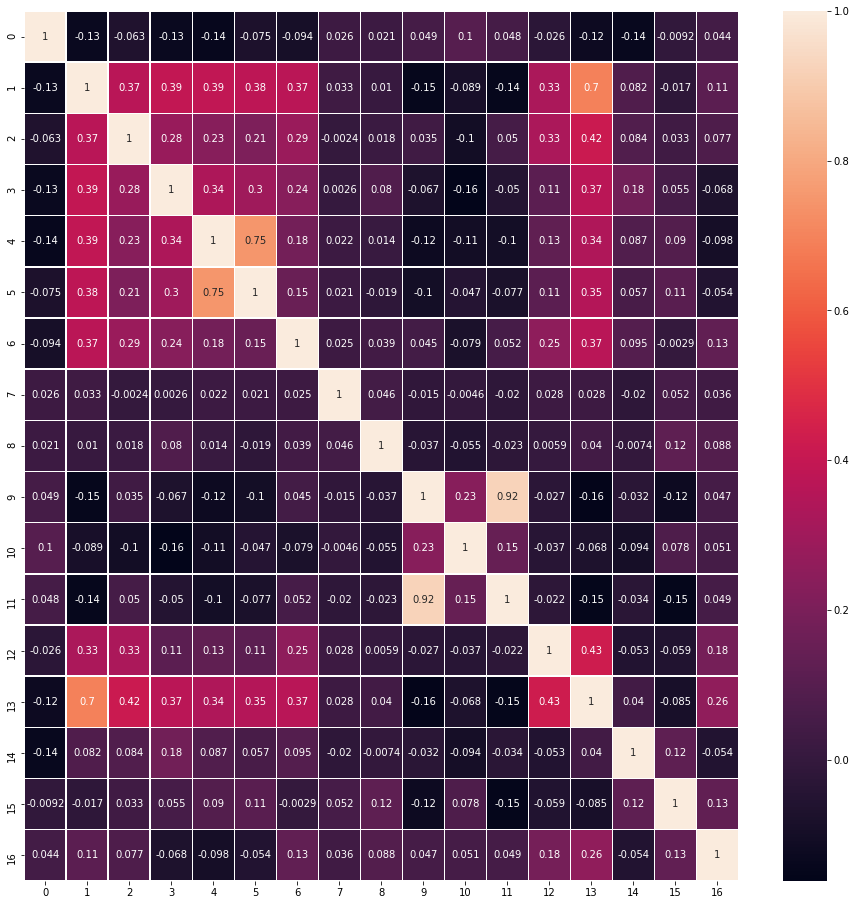

In [26]:
plt.figure(figsize = (16,16))
ax = sns.heatmap(train_df.corr(), annot=True, linewidths=.5)

In [27]:
train_features = train_df[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
y = train_df.loc[:,16:] # train_label

ERROR! Session/line number was not unique in database. History logging moved to new session 88


In [28]:
train_features

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1778.0,10038.0,4106.0,9.0000,1500000.0,6.0,72.0
1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4548.0,9332.0,6867.0,12.0000,1500000.0,30.0,56.0
2,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,5174.0,9021.0,3693.0,12.0000,1600000.0,20.0,109.0
3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1490.0,8954.0,2139.0,8.2500,1500000.0,15.0,54.0
4,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1688.0,8851.0,2145.0,14.8500,2100000.0,10.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3288,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3393.0,6930.0,3921.0,10.5000,1600000.0,11.0,21.0
3289,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3393.0,6930.0,3921.0,18.9600,2200000.0,2.0,1.0
3290,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3393.0,6930.0,3921.0,21.2000,2500000.0,1.0,18.0
3291,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1669.0,10065.0,3994.0,10.5625,400000.0,21.0,181.0


In [29]:
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(train_features, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(2634, 15) (329, 15) (330, 15) (2634, 1) (329, 1) (330, 1)


In [0]:
# from keras import Sequential
# from keras.layers import Dense

classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=15))
classifier.add(Dropout(0.2))
#Second  Hidden Layer
#classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#classifier.add(Dropout(0.2))
#Third  Hidden Layer
# classifier.add(Dense(2, activation='relu', kernel_initializer='random_normal'))
# classifier.add(Dropout(0.2))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [37]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


In [0]:
classifier.compile(optimizer ='adam',loss='categorical_crossentropy', metrics =['accuracy'])

In [40]:
history = classifier.fit(X_train,y_train, batch_size=10, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
264/264 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5228 - val_loss: nan - val_accuracy: 0.5745
Epoch 2/100
264/264 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5220 - val_loss: nan - val_accuracy: 0.5745
Epoch 3/100
264/264 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5220 - val_loss: nan - val_accuracy: 0.5745
Epoch 4/100
264/264 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5220 - val_loss: nan - val_accuracy: 0.5745
Epoch 5/100
264/264 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5220 - val_loss: nan - val_accuracy: 0.5745
Epoch 6/100
264/264 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5220 - val_loss: nan - val_accuracy: 0.5745
Epoch 7/100
264/264 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5220 - val_loss: nan - val_accuracy: 0.5745
Epoch 8/100
264/264 [====================

In [0]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

In [0]:
classifier.evaluate(X_test, y_test)[1]


In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [0]:
# x = train_df.loc[:,'fac_1':'fac_8']
# y = train_df.loc[:,'gender':]

In [0]:
# features = train_df.loc[:,'poi_1':'total_call']
# label = train_df.loc[:,'gender':]
# train_label

In [0]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X = sc.fit_transform(train_features)
# X

In [0]:
# X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [0]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

In [0]:
# y_pred=classifier.predict(X_test)

In [0]:
# input_layer = Input(shape=(train_features.shape[1],))
# dense_layer_1 = Dense(15, activation='relu')(input_layer)
# dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
# output = Dense(train_label.shape[1], activation='softmax')(dense_layer_2)

# model = Model(inputs=input_layer, outputs=output)
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])



In [0]:
# train_label.shape

In [0]:
# model.summary()

In [0]:
# history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.3)

In [0]:
# score = model.evaluate(X_test, y_test, verbose=1)

# print("Test Score:", score[0])
# print("Test Accuracy:", score[1])